In [1]:
%matplotlib widget
import sys
sys.path.append('/home/massoale/Stage_M2/Analyse/Stage_M2-main/stage_diags/diagnostics_pkg/')
sys.path.append('/home/massoale/Stage_M2/Analyse/Stage_M2-main/stage_diags/diagnostics_pkg/.ipynb_checkpoints')
sys.path.append('/home/massoale/Stage_M2/Analyse/qgutils-master/')
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import io_utils as io
import operators as op
import qgutils as qg
import xarray as xr
import scipy as sp

# Selecting the simulations

In [2]:
#Number of simulation you want to load
#simu_numbers=np.array([47,48,49,50,51,52,53,54])

simu_numbers=np.array([83,84,85,91,116,153,154,207,209,210,
                       301,302,303,304,305,307,309,610,611,612,313,314,315,316,317,318,319,320,321]+[n for n in range(101,110)])
simu_name_tab=np.array([f'String {num}' for num in simu_numbers])

#Arrays where I will store the parameters:

kh_E_tab= np.zeros_like(simu_numbers,dtype='float') 
k_f_tab= np.zeros_like(simu_numbers,dtype='float')
k_beta_tab= np.zeros_like(simu_numbers,dtype='float')
Z_tab=np.zeros_like(simu_numbers,dtype='float')
KbetaOL_tab=np.zeros_like(simu_numbers,dtype='float')
Oc_tab_l=np.zeros_like(simu_numbers,dtype='float')
Zo_tab_l=np.zeros_like(simu_numbers,dtype='float')

#Choose between 'local' or 'dahu'
where='dahu'


#Reading the netcdf file

for i,n in enumerate(simu_numbers):
    if where=='local':
        if n<10:
            simu_name='outdir_000'+str(n)
        elif n<100 and n>=10:
            simu_name='outdir_00'+str(n)
        Path='/home/massoale/Simu_Test/qgw-main/src/'+simu_name+'/'

    elif where=='dahu':
        simu_name='dahu_'+str(n)
        Path='/home/massoale/Simu_Test/simu_dahu/simu_dahu'+str(n)+'/outdir_0001/'
        
    else:
        print('Error: where not recognized')
        sys.exit()
    print('la simulation chargée est: ' + simu_name )
    print("depuis: "+where)
    simu_name_tab[i]=simu_name
    print(simu_name_tab)
    filenames=['/vars.nc']



    dataset=nc.Dataset(Path+filenames[0])

    #t=dataset.variables['time'][:]
    #x=dataset.variables['x'][:]
    #y=dataset.variables['y'][:]
    #psi=dataset.variables['psi'][:,:,:,:]
    #q=dataset.variables['q'][:,:,:,:]
    #print("psi shape",psi.shape)
    
    #Lecture des paramètres :

    param=io.read_params(Path)

    f0= param['f0']
    beta=param['beta']
    hEkb=param['hEkb']
    dh=param['dh'][0]
    Lx=param['Lx']
    nx=param['NX']
    ny=param['NY']
    k_f=param['k_f']
    sigma_f=param['sigma_f']
    bc_fac=param['bc_fac']
    nu_hyper=param['nu_hyper']
    n_hyper=param['n_hyper']
    dt_out=param['dt_out']

    epsilon=sigma_f**2
    r=f0*hEkb/(2*dh)
    
    #Calcul de kh_E
    kh_E=np.sqrt(r**3/epsilon)
    kh_E_tab[i]=kh_E

    #Calcul de k_beta
    k_beta=(beta**3/epsilon)**(1/5)
    k_beta_tab[i]=k_beta

    k_f_tab[i]=k_f

    #computing zonostrophy:

    Z_tab[i]= (beta**2*epsilon/(r**5))**(1/20)
    print('Zonostrophie:',Z_tab[i]) 
    
    #Computing Kbeta*L
    k_betar=beta**0.5/(epsilon/r)**(1/4)
    KbetaOL_tab[i]= 1/(k_betar*Lx)

    #Computin occupation and zonostrophy by the definition
    Oc_tab_l[i]= (epsilon/(beta**2*r*(Lx/(2*np.pi))**4))**(1/4) #k_Rh/k_L
    Zo_tab_l[i]= (beta**2*epsilon/r**5)**(1/20)



la simulation chargée est: dahu_83
depuis: dahu
['dahu_83' 'String 84' 'String 85' 'String 91' 'String 116' 'String 153'
 'String 154' 'String 207' 'String 209' 'String 210' 'String 301'
 'String 302' 'String 303' 'String 304' 'String 305' 'String 307'
 'String 309' 'String 610' 'String 611' 'String 612' 'String 313'
 'String 314' 'String 315' 'String 316' 'String 317' 'String 318'
 'String 319' 'String 320' 'String 321' 'String 101' 'String 102'
 'String 103' 'String 104' 'String 105' 'String 106' 'String 107'
 'String 108' 'String 109']
Zonostrophie: 2.817585085135084
la simulation chargée est: dahu_84
depuis: dahu
['dahu_83' 'dahu_84' 'String 85' 'String 91' 'String 116' 'String 153'
 'String 154' 'String 207' 'String 209' 'String 210' 'String 301'
 'String 302' 'String 303' 'String 304' 'String 305' 'String 307'
 'String 309' 'String 610' 'String 611' 'String 612' 'String 313'
 'String 314' 'String 315' 'String 316' 'String 317' 'String 318'
 'String 319' 'String 320' 'String 321' 

['dahu_83' 'dahu_84' 'dahu_85' 'dahu_91' 'dahu_116' 'dahu_153' 'dahu_154'
 'dahu_207' 'dahu_209' 'dahu_210' 'dahu_301' 'dahu_302' 'dahu_303'
 'dahu_304' 'dahu_305' 'dahu_307' 'dahu_309' 'dahu_610' 'dahu_611'
 'dahu_612' 'dahu_313' 'dahu_314' 'dahu_315' 'dahu_316' 'dahu_317'
 'dahu_318' 'dahu_319' 'dahu_320' 'dahu_321' 'dahu_101' 'dahu_102'
 'dahu_103' 'dahu_104' 'dahu_105' 'dahu_106' 'dahu_107' 'dahu_108'
 'dahu_109']


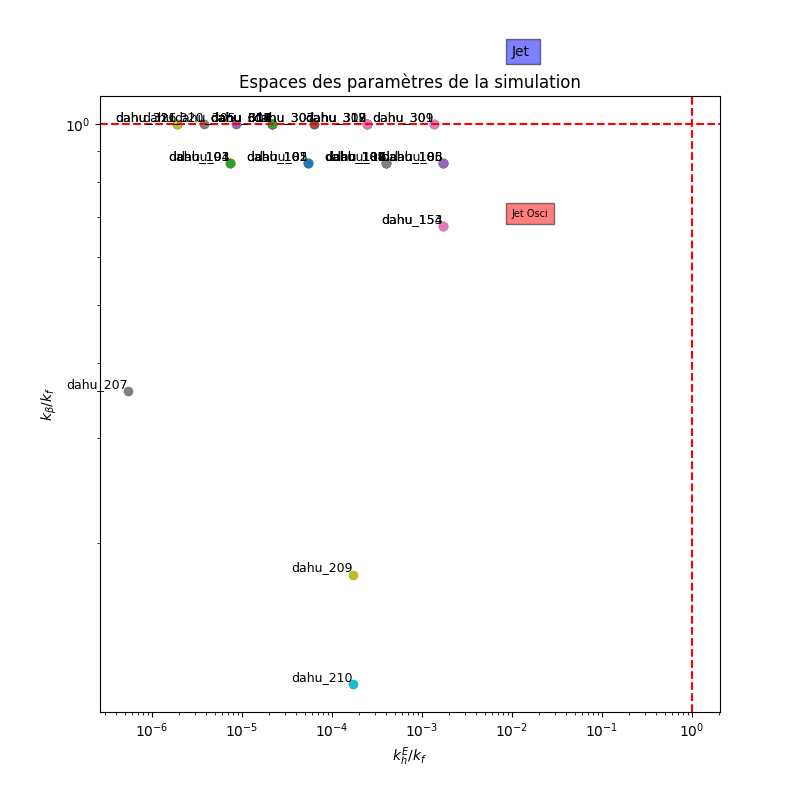

In [3]:
#Plotting the parameters space

print(simu_name_tab)

x=kh_E_tab/k_f_tab
y=k_beta_tab/k_f_tab
plt.figure(figsize=(8,8))
# Plotting the data with descriptions
for i, desc in enumerate(simu_name_tab):
    plt.scatter(x[i], y[i], label=desc)
    plt.text(x[i], y[i], desc, fontsize=9, ha='right', va='bottom')

# Setting logarithmic scales for both axes
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k_h^E/k_f$')
plt.ylabel(r'$k_\beta/k_f$')
plt.axhline(y=1, color='r', linestyle='--')
plt.axvline(x=1, color='r', linestyle='--')

#plt.text(1.2, 1.3, 'Zone 1', fontsize=7, bbox=dict(facecolor='red', alpha=0.5))
plt.text(0.01, 0.7, 'Jet Osci', fontsize=7, bbox=dict(facecolor='red', alpha=0.5))
plt.text(0.01, 1.3, 'Jet ', fontsize=10, bbox=dict(facecolor='blue', alpha=0.5))


plt.title('Espaces des paramètres de la simulation')
plt.show()


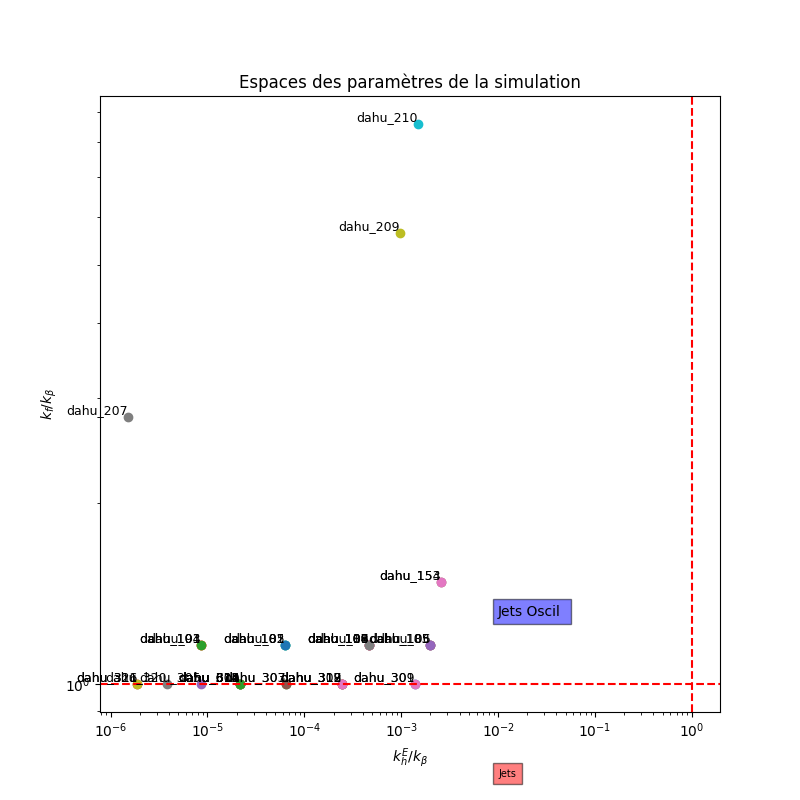

In [4]:
x=kh_E_tab/k_beta_tab
y=k_f_tab/k_beta_tab

plt.figure(figsize=(8,8))
# Plotting the data with descriptions
for i, desc in enumerate(simu_name_tab):
    plt.scatter(x[i], y[i], label=desc)
    plt.text(x[i], y[i], desc, fontsize=9, ha='right', va='bottom')

# Setting logarithmic scales for both axes
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k_h^E/k_\beta$')
plt.ylabel(r'$k_f/k_\beta$')
plt.axhline(y=1, color='r', linestyle='--')
plt.axvline(x=1, color='r', linestyle='--')

#plt.text(1.2, 1.3, 'Zone 1', fontsize=7, bbox=dict(facecolor='red', alpha=0.5))
plt.text(0.01, 0.7, 'Jets', fontsize=7, bbox=dict(facecolor='red', alpha=0.5))
plt.text(0.01, 1.3, 'Jets Oscil ', fontsize=10, bbox=dict(facecolor='blue', alpha=0.5))


plt.title('Espaces des paramètres de la simulation')
plt.show()


# Zonostrophy plot

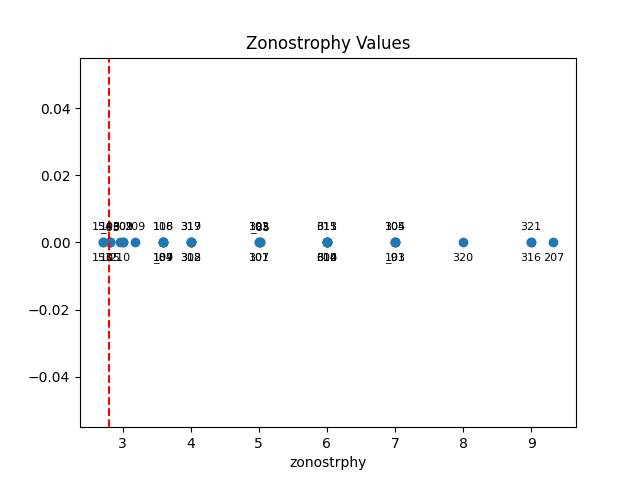

[2.70494977 2.70494977 2.81758509 2.81758509 2.81758509 2.96227541
 3.         3.         3.17728524 3.5927681  3.5927681  3.5927681
 3.5927681  3.5927681  4.         4.         4.         4.
 5.         5.         5.01045354 5.01045354 5.01045354 6.
 6.         6.         6.         6.         6.         6.00000182
 7.         7.00212196 7.00212196 7.00212196 8.0000002  9.
 9.         9.32768863]


In [5]:
plt.figure()

# Plotting the scatter plot
plt.scatter(Z_tab, [0] * Z_tab.shape[0])

# Adding text above each point
for i, desc in enumerate(simu_name_tab):
    if i%2==0:

        plt.text(Z_tab[i], 0.006, desc[-3:], fontsize=8, ha='center', va='top')
    else:
        plt.text(Z_tab[i], -0.006, desc[-3:], fontsize=8, ha='center', va='bottom')

plt.xlabel('zonostrphy')
plt.title('Zonostrophy Values')
plt.axvline(x=2.8, color='r', linestyle='--')
plt.show()

print(np.sort(Z_tab))

# Parameters space

In [6]:
# x=Z_tab
# y=KbetaOL_tab

# plt.figure(figsize=(9,9))
# # Plotting the data with descriptions
# for i, desc in enumerate(simu_name_tab):
#     plt.scatter(x[i], y[i], label=desc)
#     plt.text(x[i], y[i], desc, fontsize=9, ha='left', va='bottom')


# plt.xlabel(r'$Z=L_{\beta r}/L_\epsilon$')
# plt.ylabel(r'$Oc=L_{\beta r}/L_x$')
# plt.yscale('log')

# plt.title('Espaces des paramètres de la simulation')
# plt.show()

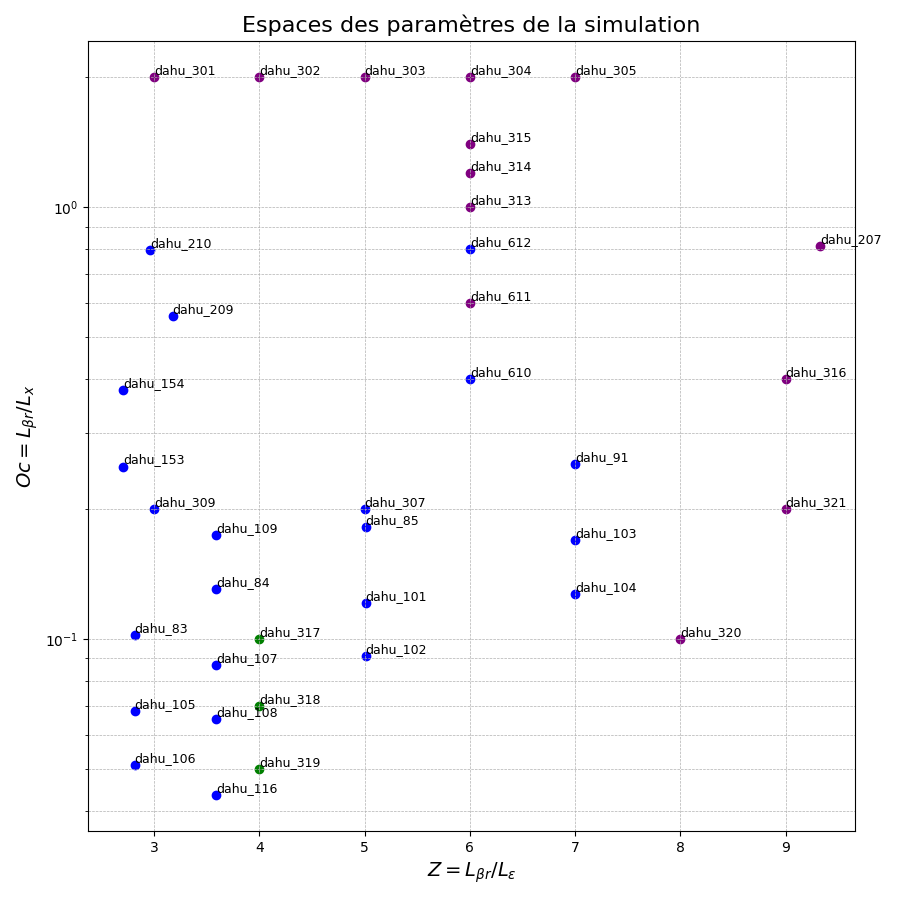

In [8]:
import matplotlib.pyplot as plt

# Assuming x, y, and simu_name_tab are already defined
x = Zo_tab_l
y = Oc_tab_l

plt.figure(figsize=(9, 9))
# Define the specific simu_name values that don't check the energy requirement
highlighted_simus = [207,301, 302, 303, 304, 305,306,321,320,611,313,314,315,316]
cool_simus=[317,318,319]
# Plotting the data with descriptions
for i, desc in enumerate(simu_name_tab):
    simu_number = int(desc.split('_')[-1])  # Extract the numerical part
    if simu_number in highlighted_simus:
        color = 'purple'
    elif simu_number in cool_simus:
        color = '
    else:
        color = 'blue'

    
    plt.scatter(x[i], y[i],color=color ,marker='o')  
    plt.text(x[i], y[i], desc, fontsize=9, ha='left', va='bottom')

# Labels and title
plt.xlabel(r'$Z=L_{\beta r}/L_\epsilon$', fontsize=14)
plt.ylabel(r'$Oc=L_{\beta r}/L_x$', fontsize=14)
plt.yscale('log')

plt.title('Espaces des paramètres de la simulation', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout() 
plt.savefig('figures/Espace_param/param_space.png')
plt.show()
